<a href="https://colab.research.google.com/github/satyamgipu/Iplt20analysis/blob/master/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [3]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path="/content/drive/My Drive/"
teams=pd.read_csv(path+"teams.csv")
match=pd.read_csv(path+"matches.csv")
Players=pd.read_excel(path+"Players.xlsx")
deliveries=pd.read_csv(path+"deliveries.csv")
teamwise_home_and_away=pd.read_csv(path+"teamwise_home_and_away.csv")
teams=pd.read_csv(path+"teams.csv")
most_runs_average_strikerate=pd.read_csv(path+"most_runs_average_strikerate.csv")



TOSS Vs winners

In [6]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [7]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team1   15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


In [8]:
most_runs_average_strikerate.head(1)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351


In [9]:
teamwise_home_and_away.head(1)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.5,62.5


In [10]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
Players.head(1)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India


In [12]:
deliveries.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [13]:
match.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [14]:
match_id_with_no_result=list(match[match["result"]=="no result"].id)
match_id_with_no_result

[301, 546, 571, 11340]

In [15]:
match=match[~match["id"].isin(match_id_with_no_result)]
deliveries=deliveries[~deliveries["match_id"].isin(match_id_with_no_result)]

In [16]:
match[match["id"]==546]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [17]:
def inning_finder(winner,toss_decision,toss_winner):
  """ function return in which inning  a team wins the match""" 
  innings_winner=0
  if toss_winner==winner and toss_decision=="field":
    innings_winner=2
  elif toss_winner==winner and toss_decision=="bat":
    innings_winner=1
  elif toss_winner!=winner and toss_decision=="bat":
    innings_winner=2
  elif toss_winner!=winner and toss_decision=="field":
    innings_winner=1
  return innings_winner
match["innings_winner"]=match.apply(lambda x: inning_finder(x["winner"],x["toss_decision"],x["toss_winner"]),
                                                                                axis=1)

In [18]:
inning_wise_percentage=match[["team1","team2","innings_winner","winner"]].value_counts("innings_winner")/match.shape[0]
first_inning_percentage_win=inning_wise_percentage.iloc[0]
second_inning_percentage_win=inning_wise_percentage.iloc[1]


In [19]:
print(first_inning_percentage_win)
second_inning_percentage_win

0.5545212765957447


0.4454787234042553

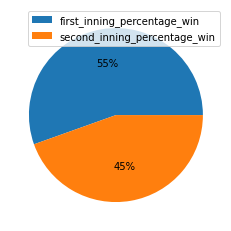

In [20]:
plt.pie([first_inning_percentage_win,second_inning_percentage_win],autopct='%1.0f%%')
plt.legend(["first_inning_percentage_win","second_inning_percentage_win"])

In [21]:
inning_wise_extra_runs=pd.DataFrame(deliveries.groupby(["match_id","inning"]).agg({"extra_runs":"sum"}))


In [22]:
inning_wise_extra_runs.shape

(1522, 1)

In [23]:
inning_wise_extra_runs=inning_wise_extra_runs.reset_index()

In [24]:
inning_wise_extra_runs.drop(inning_wise_extra_runs[inning_wise_extra_runs["inning"]>2].index,inplace=True )

In [25]:
inning_wise_extra_runs

,match_id,inning,extra_runs
0,1,1,7
1,1,2,6
2,2,1,8
3,2,2,4
4,3,1,4
...,...,...,...
1517,11413,2,5
1518,11414,1,8
1519,11414,2,11
1520,11415,1,3


In [26]:
def inning_wise_wins(x,temp=match):
 """ function return the wins or loose of the match based on the index and the inning with the help of match dataframe which is set as default """
 if int(match.loc[match["id"]==x["match_id"]]["innings_winner"])==x["inning"]:
     return "wins"
 else:
     return "Loose"
inning_wise_extra_runs["win_Loose"]=inning_wise_extra_runs.apply(lambda x: inning_wise_wins(x),axis=1)

In [27]:
inning_wise_extra_runs

,match_id,inning,extra_runs,win_Loose
0,1,1,7,wins
1,1,2,6,Loose
2,2,1,8,Loose
3,2,2,4,wins
4,3,1,4,Loose
...,...,...,...,...
1517,11413,2,5,wins
1518,11414,1,8,Loose
1519,11414,2,11,wins
1520,11415,1,3,wins


In [28]:
inning_wise_extra_runs.reset_index(inplace=True)

In [29]:
inning_wise_extra_runs.shape

(1504, 5)

In [30]:
MoreXtrarunswins=0
lessXtrarunsLoose=0
independentxtraruns=0

""" code to count wins when extra runs is greater or lesser or equal"""
for i in range(0,inning_wise_extra_runs.shape[0],2):
   if (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="wins":
     MoreXtrarunswins+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]>inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]<inning_wise_extra_runs.iloc[i+1]["extra_runs"]) and inning_wise_extra_runs.iloc[i+1]["win_Loose"]=="Loose":
     lessXtrarunsLoose+=1
   elif (inning_wise_extra_runs.iloc[i]["extra_runs"]==inning_wise_extra_runs.iloc[i+1]["extra_runs"]):
      independentxtraruns+=1
print(MoreXtrarunswins)
print(lessXtrarunsLoose)
print(independentxtraruns)
   


353
335
64


In [50]:
win_Count=(inning_wise_extra_runs.shape[0])//2
win_Count

752

In [51]:
XtrarunsWinsPercentage=(MoreXtrarunswins/win_Count)*100
XtrarunsWinsPercentage

46.941489361702125

In [52]:
XtrarunsLoosePercentage=(lessXtrarunsLoose/win_Count)*100
XtrarunsLoosePercentage

44.547872340425535

In [53]:
independentxtrarunspercentage=(independentxtraruns/win_Count)*100
independentxtrarunspercentage

8.51063829787234

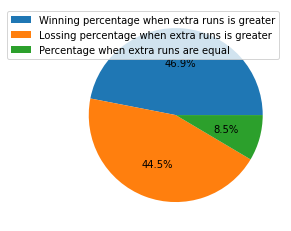

In [55]:
plt.pie([XtrarunsWinsPercentage,XtrarunsLoosePercentage,independentxtrarunspercentage],autopct='%1.01f%%')
plt.legend(["Winning percentage when extra runs is greater","Lossing percentage when extra runs is greater","Percentage when extra runs are equal"],loc=1)
